In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Однофакторная линейная регрессия

In [4]:
data_frame = pd.read_csv('data/russian-gdp-pc.csv', parse_dates=['time'], decimal=',')
display(data_frame.T)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
time,1995-01-01 00:00:00,1995-04-01 00:00:00,1995-07-01 00:00:00,1995-10-01 00:00:00,1996-01-01 00:00:00,1996-04-01 00:00:00,1996-07-01 00:00:00,1996-10-01 00:00:00,1997-01-01 00:00:00,1997-04-01 00:00:00,...,1998-07-01 00:00:00,1998-10-01 00:00:00,1999-01-01 00:00:00,1999-04-01 00:00:00,1999-07-01 00:00:00,1999-10-01 00:00:00,2000-01-01 00:00:00,2000-04-01 00:00:00,2000-07-01 00:00:00,2000-10-01 00:00:00
GDP,652.87,601.893,590.792,593.667,580.435,612.063,620.847,614.36,609.708,664.246,...,698.793,668.498,663.786,703.213,707.238,694.329,704.055,738.637,753.565,754.459
Private consumption,357.191,356.533,376.951,379.866,385.749,392.194,417.342,426.991,394.661,416.367,...,469.775,477.421,415.65,477.013,498.525,510.171,447.272,504.1,522.277,533.585


# Уравнение линейной регрессии по методу наименьших квадратов

In [44]:
size = data_frame['GDP'].count()
y__ = data_frame['Private consumption']
sum_y = y__.sum()
sum_x = data_frame['GDP'].sum()
product_data_frame = data_frame['GDP'] * data_frame['Private consumption']
sum_xy = product_data_frame.sum()
pc_squared = data_frame['GDP']*data_frame['GDP'].T
#print(pc_squared)
sum_xx = pc_squared.sum()
print(f'sum_x: {sum_x} sum_y: {sum_y} sum_xy: {sum_xy} sum_xx: {sum_xx}') 
# generic linear regression equation
coef_b = (size * sum_xy - sum_x * sum_y)/(size * sum_xx - sum_x**2)
coef_a = (sum_y - coef_b * sum_x)/size
print(f'Коэффициент b: {coef_b} коэффициент a: {coef_a}')
print(f'Уравненение линейной регресии y = {coef_b} * x_i {coef_a}')

sum_x: 15962.083999999999 sum_y: 10514.885999999999 sum_xy: 7048137.790144 sum_xx: 10678569.752978
Коэффициент b: 0.8786449496333661 коэффициент a: -146.2549371759817
Уравненение линейной регресии y = 0.8786449496333661 * x_i -146.2549371759817


# График линии регрессии с наблюдаемыми данными

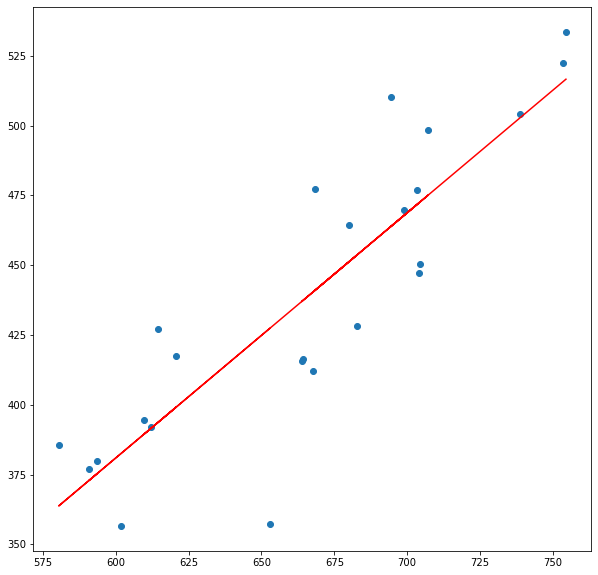

In [6]:
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(data_frame['GDP'], data_frame['Private consumption'])
linear_x = data_frame['GDP'] #np.arange(550, 800, 2)
#inear_x = np.arange(550, 800, 2)
linear_y = coef_b * linear_x + coef_a
plt.plot(linear_x, linear_y, 'r')
plt.show()

# Коэффициент детерминации и дисперсии коэффициентов

In [25]:
# Коэффициент дерерминации
__y = data_frame['Private consumption']
__y_mean = __y.mean()
__y_model_var = (linear_y-__y_mean)**2 # Сумма квадратов, объяснённая моделью
__y_left_var = (__y - __y_mean)**2 # Полная сумма квадратов
r_squared = __y_model_var.sum()/__y_left_var.sum() # Коэффициент детерминации

# Используем остаточную сумму квадратов
__D_est = 1./(size - 2) * ((__y - linear_y)**2).sum() # Несмещённая оценка дисперсии
# Оценка дисперсии для alpha
#alpha_D_est = __D_est * (linear_x**2).sum()/(size * ((linear_x - linear_x.mean())**2).sum())
alpha_D_est = __D_est *( 1./size + linear_x.mean()**2/((linear_x - linear_x.mean())**2).sum())
# Оценка дисперсии для beta
beta_D_est = __D_est / ((linear_x - linear_x.mean())**2).sum()

print(f" СКО alpha: {alpha_D_est**0.5}, СКО beta: {beta_D_est**0.5}")

 СКО alpha: 71.10411002142989, СКО beta: 0.10659670521946862
8.242702697277101


# Доверительные интервалы для коэффициентов

In [24]:
# Значение t(v,p) = 3.5050, где v = size - 2 = 22, а p = 0.999
# Интервал для коэффициентов вычисляется как (точечная оценка - t(v,p)* СКО, точечная оценка + t(v,p)* СКО)
t_v_p = 3.5050
alpha_trusted_range_min = coef_a - t_v_p * alpha_D_est**0.5
alpha_trusted_range_max = coef_a + t_v_p * alpha_D_est**0.5
beta_trusted_range_min = coef_b - t_v_p * beta_D_est**0.5
beta_trusted_range_max = coef_b + t_v_p * beta_D_est**0.5
print(f"доверительный интервал alpha: ({alpha_trusted_range_min}, {alpha_trusted_range_max})")
print(f"доверительный интервал beta: ({beta_trusted_range_min}, {beta_trusted_range_max})")

доверительный интервал alpha: (-395.4748428010935, 102.96496844913005)
доверительный интервал beta: (0.5050234978391286, 1.2522664014276037)


# Проверка значимости коэффициентов регрессии

In [43]:
print(f"{coef_b/beta_D_est**0.5} > t(v,p) = {t_v_p}, следовательно H0 из задания 1 отвергается.")
#equal_var

8.242702697277101 > t(v,p) = 3.505, следовательно H0 из задания 1 отвергается.


# Проверка адекватности уравнения регрессии

In [52]:
F_est = r_squared /( 1. - r_squared) *(size-2)
print(f"{F_est}")
F_est_2 = linear_y.var()/y__.var()
print(f"{F_est_2}")
alpha__ = 0.05 # уровень значимости
p_value = stats.f.cdf(F_est_2, len(y__)-1, len(linear_y)-1)
if p_value > alpha__:
    print("Гипотеза H0 о том, что модель адекватна с уровнем значимости alpha__:{alpha__} верна.")
else:
    print("Гипотеза H0 о том, что модель адекватна с уровнем значимости alpha__:{alpha__} неверна.")

67.94214775569995
0.7553983249348659
Гипотеза H0 о том, что модель адекватна с уровнем значимости alpha__:{alpha__} верна.


# Источники
- http://sun.tsu.ru/mminfo/2016/Dombrovski/book/chapter-2/chapter-2-4.htm
- https://function-x.ru/statistics_regression1.html